In [2]:
#@title 1) Montando o Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#@title 2) Importando bibliotecas e declarando variáveis

#importando as bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Após baixar os dados do site, crie outra aba, digite "1" copie essa célula, na primeira aba, selecione somente os números (sem as primeiras coluna e linha) e clique com o botão direito
# e depois clique em "Colar Especial" e selecione a opção de "Divisão" na parte de "Operação"
# Isso tem como objetivo em transformar os dados em números e preencher os espaços vazios com 0

# Em alguns casos o código ainda apresenta uns erros de concatenação de string,
# ai é necessário trabalhar na base do excel convertendo os tipo GERAL para NUMERICO e ainda fazer ajustes de padrão Americano e Brasileiro de , e .

# Importando a base de dados
Pxcel = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/XPE_FCDRV_02_Desafio/Dados/02_Limpo/desafiolimpo.xlsx")

#Declarando as variaveis
Ativo = Pxcel["TICKER"]
Precos = Pxcel["PRECO"]

#Exibindo parte dos dados (Análise exploratória da base de dados)
print(Pxcel.head())



   TICKER   PRECO  ULTIMO DIVIDENDO     DY  VALOR PATRIMONIAL COTA   P/VP  \
0  THRA11  138.50          0.130000   0.00                    9.54  14.52   
1  LPLP11    0.00          7.790589   0.00                  568.94   0.00   
2  BLUR11   91.14          1.030000  12.43                  100.87   0.90   
3  CXAG11   75.92          0.750000  12.25                  114.69   0.66   
4  PLRI11   22.83          0.153959   9.48                   32.26   0.71   

   LIQUIDEZ MEDIA DIARIA  PERCENTUAL EM CAIXA  CAGR DIVIDENDOS 3 ANOS  \
0                   0.00               140.47                   90.73   
1                   0.00                 0.22                    0.00   
2                 809.67                 6.03                    0.00   
3               93209.04                 0.08                    0.00   
4                1971.28                 1.06                   -9.14   

    CAGR VALOR CORA 3 ANOS    PATRIMONIO  N COTISTAS   GESTAO   N COTAS  
0                    -2.

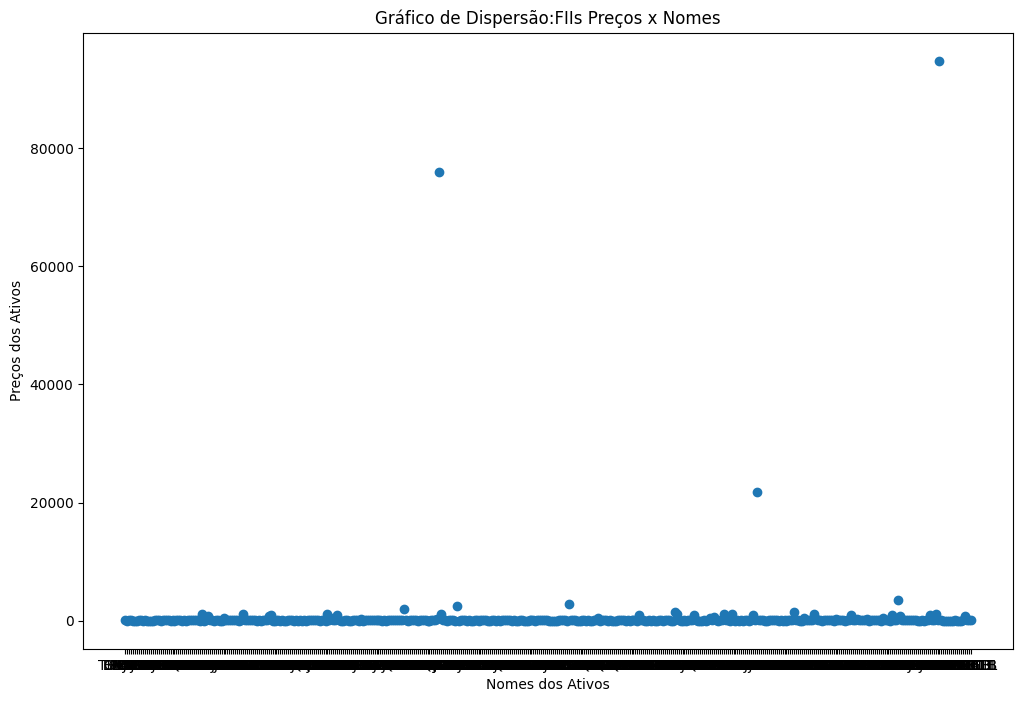

In [ ]:
#@title 3) Criando um gráfico de disperção

# cria o gráfico de dispersão
plt.figure(figsize=(12, 8))
plt.scatter(Ativo, Precos)

# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

# mostra o gráfico
plt.show()

Observe que o gráfico fica bem ilegivel devido a alguns valores sairem bem do padrão; Vamos arrumar isto;

Percentil 95: 994.0609999999999


Text(0, 0.5, 'Preços dos Ativos')

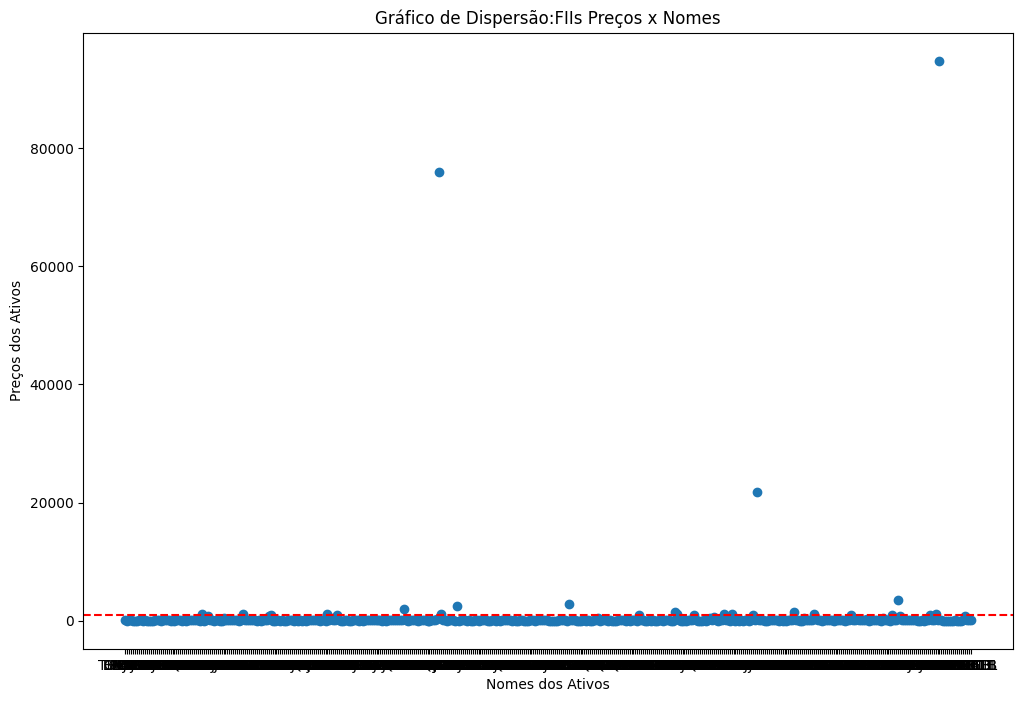

In [ ]:
#@title 4) Trabalhando com percentil (Preço)

#Calcula qual o valor máximo que contempla 95% dos ativos, ou seja, o valor que divide os ativos nas 5% mais caras e as 95% mais baratas
upper_bound = np.percentile(Precos, 95)

# Mostra o valor do percentil calculado
print("Percentil 95: "+str(upper_bound))

#Cria o grafico
plt.figure(figsize=(12, 8))
plt.scatter(Ativo, Precos)
#Cria a linha paralela a X
plt.axhline(upper_bound,color='r', linestyle='--')
# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

In [ ]:
#@title 5) Excluindo preços = R$ 0,00 e acima do Percentil 95%

# Exclui as linhas dos ativos que os preços são iguais a 0
Pxcel = Pxcel[Pxcel['PRECO'] !=0]
# Exclui as linhas dos ativos que os preços são superiores ao percentil de 95
Pxcel = Pxcel[Pxcel['PRECO'] < upper_bound]

# Salva o dataframe em um novo arquivo Excel
output_file = 'desafiolimpo2.xlsx'
# Index = False significa que não irá incluir o numero da linha como uma nova coluna no excel
Pxcel.to_excel(output_file, index=False)

print("Os Outliers foram excluídos com sucesso.")

Os Outliers foram excluídos com sucesso.


O novo arquivo será salvo dentro do Google Colab fora de DRIVE;

Text(0, 0.5, 'Preços dos Ativos')

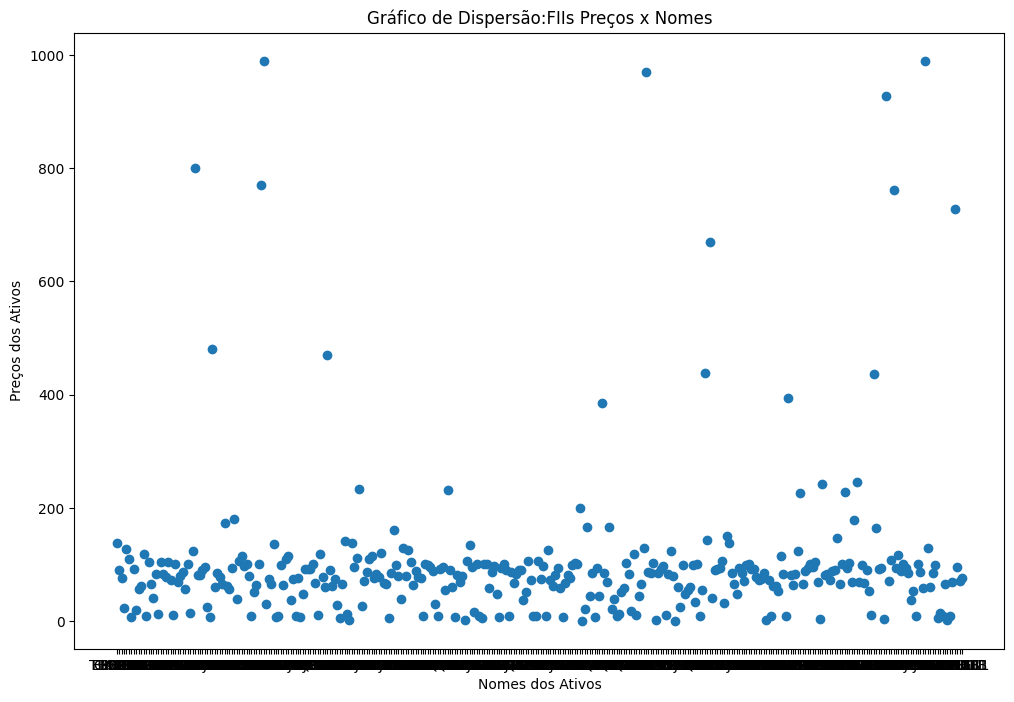

In [ ]:
#@title 6) Lendo o novo arquivo de dados e construindo o gráfico

# Le o novo excel
Pxecel2 = pd.read_excel("/content/desafiolimpo2.xlsx")

#Declara novas variáveis
Ativo2 = Pxecel2["TICKER"]
Precos2 = Pxecel2["PRECO"]

#Cria o gráfico
plt.figure(figsize=(12, 8))
plt.scatter(Ativo2, Precos2)
# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

A fim de melhorar ainda mais a visualização do gráfico, vamos limitar o eixo Y em até o valor de R$ 200,00

Text(0, 0.5, 'Preços dos Ativos')

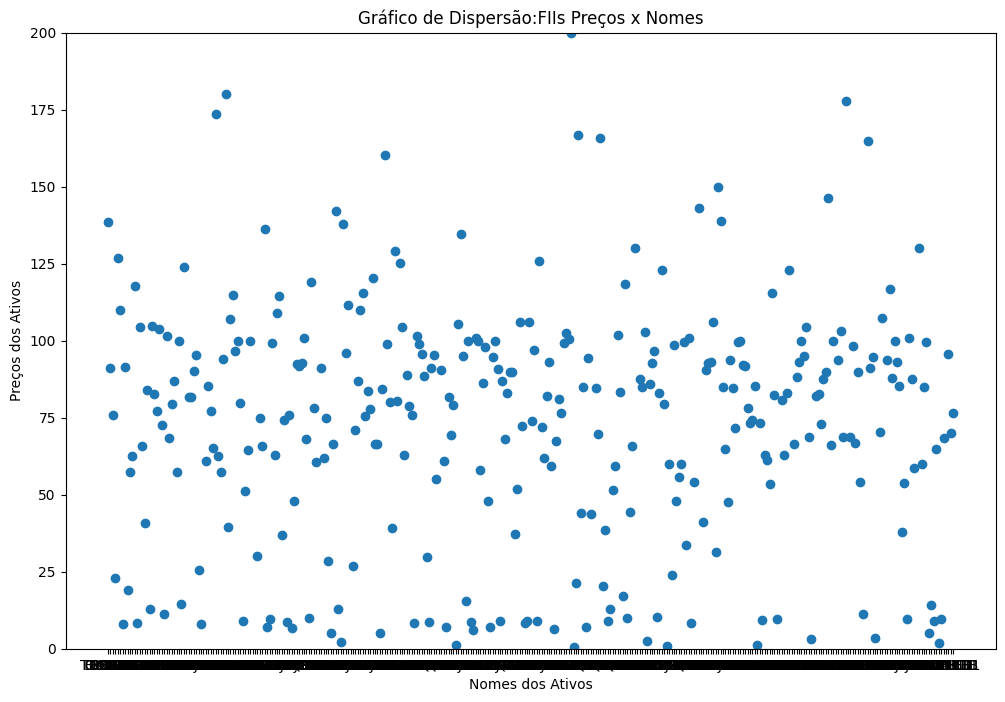

In [ ]:
#@title 7) Limitando o gráfico para até o valor de R$ 200,00

#A fim de melhorar ainda mais a vizualização do gráfico, vamos limitar o eixo Y em até 200
plt.figure(figsize=(12, 8))
plt.scatter(Ativo2, Precos2)
#Limita o eixo Y de 0 até 200
plt.ylim(0, 200)
# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs Preços x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("Preços dos Ativos")

Vamos analisar agora o parametro fundamentalista P/VP para ver se os FIIs estão baratos (abaixo do valor patrimonial) neste momento;

Text(0, 0.5, 'P/VP dos Ativos')

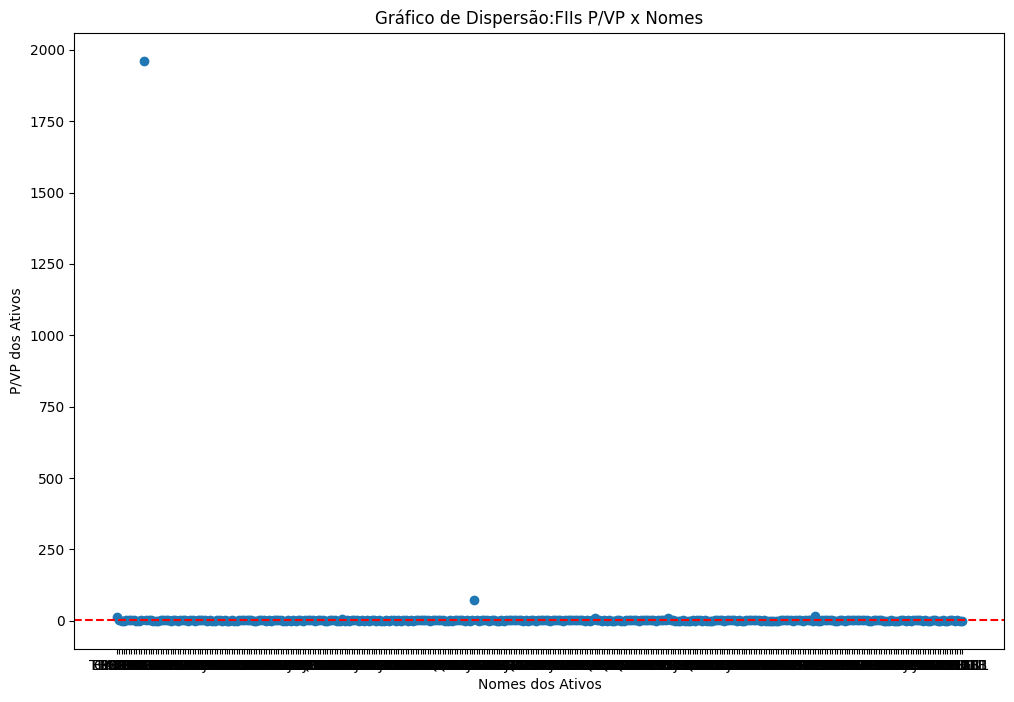

In [ ]:
#@title 8) Analisando o parâmetro fundamentalista P/VP

PVP = Pxecel2["P/VP"]

plt.figure(figsize=(12, 8))
plt.scatter(Ativo2, PVP)

#Acrescentamos a contante P/VP = 1 que seria o "Preço Justo dos FIIs"
plt.axhline(1, color='r', linestyle='--')

# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs P/VP x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("P/VP dos Ativos")

Como na primeira analise (preço) o gráfico fica meio ilegivel devido a valores fora do padrão; vamos arrumar isto;

In [ ]:
#@title 9) Trabalhando com percentil (P/VP)

#Calcula qual o valor mínimo que contempla 95% dos ativos em relação aos valores de P/VP para eliminar os fora do padrão;
lower_bound = np.percentile(PVP, 5)
#Calcula qual o valor máximo que contempla 95% dos ativos em relação ao parâmetro P/VP
upper_bound = np.percentile(PVP, 95)
# Exclui as linhas dos ativos que estão fora da faixa
Pxcel = Pxcel[Pxcel['P/VP'] > lower_bound]
Pxcel = Pxcel[Pxcel['P/VP'] < upper_bound]

# Salva o dataframe em um novo arquivo Excel
output_file = 'desafiolimpo3.xlsx'
Pxcel.to_excel(output_file, index=False)

print("Os Outliers foram excluídos com sucesso.")

Os Outliers foram excluídos com sucesso.


Text(0, 0.5, 'P/VP dos Ativos')

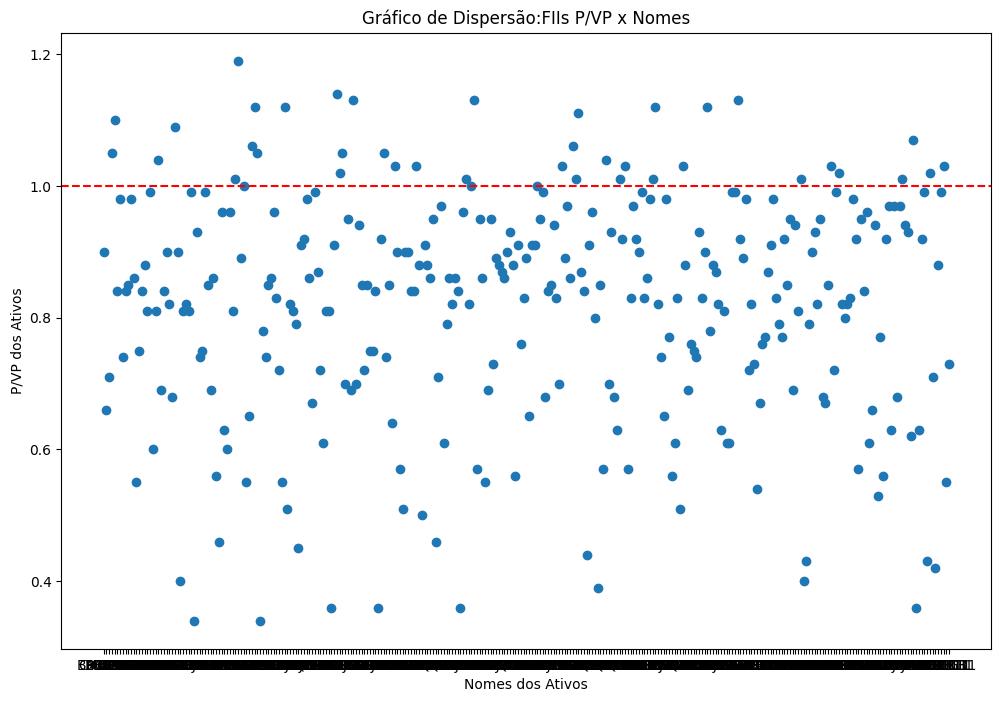

In [ ]:
#@title 10) Exibindo o gráfico melhor legível P/VP

Pxecel3 = pd.read_excel("/content/desafiolimpo3.xlsx")
Ativo3 = Pxecel3["TICKER"]
PVP3 = Pxecel3["P/VP"]

plt.figure(figsize=(12, 8))
plt.scatter(Ativo3, PVP3)
plt.axhline(1, color='r', linestyle='--')
# adiciona o título do gráfico e as legendas dos eixos
plt.title("Gráfico de Dispersão:FIIs P/VP x Nomes")
plt.xlabel("Nomes dos Ativos")
plt.ylabel("P/VP dos Ativos")

Conseguimos analisar que no atual momento temos muitos FIIs sendo negociados abaixo do valor patrimonial;

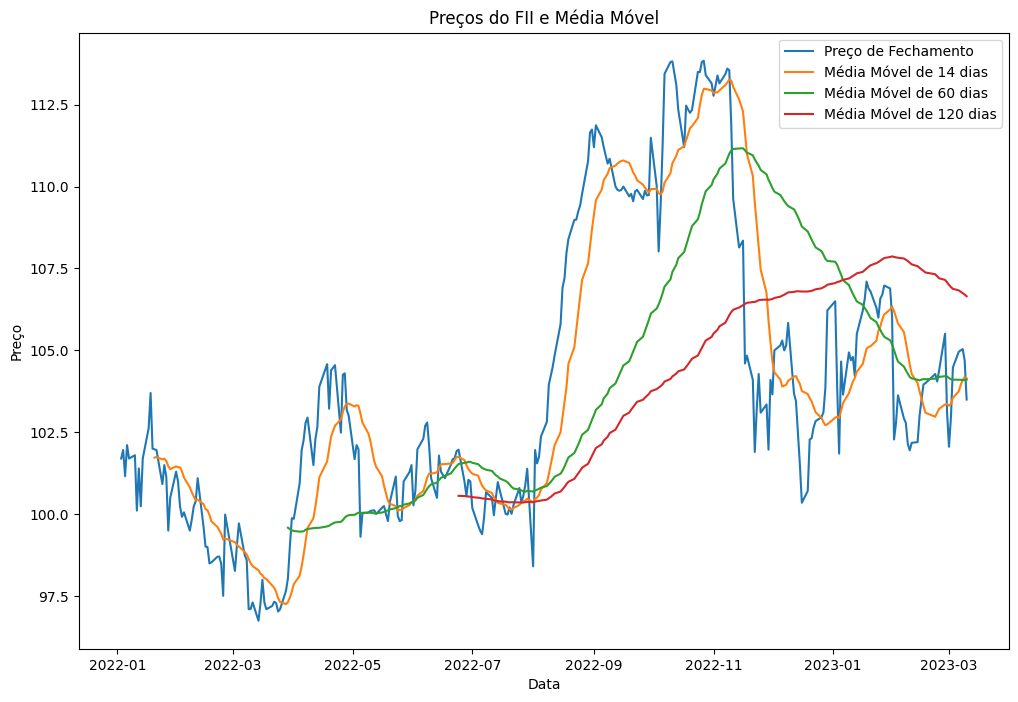

In [ ]:
#@title 11) Trabalhando com media movel

import pandas as pd
import matplotlib.pyplot as plt

# Importe os dados históricos do FII para um DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XPE_FCDRV_02_Desafio/Dados/02_Limpo/VISC11 Dados Históricos.xlsx', sheet_name='VISC11 Historical Data')

# Calcule a média móvel do FII
df['MA14'] = df['Price'].rolling(window=14).mean()
df['MA60'] = df['Price'].rolling(window=60).mean()
df['MA120'] = df['Price'].rolling(window=120).mean()

# Crie um gráfico com os preços de fechamento e a média móvel
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Price'], label='Preço de Fechamento')
plt.plot(df['Date'], df['MA14'], label='Média Móvel de 14 dias')
plt.plot(df['Date'], df['MA60'], label='Média Móvel de 60 dias')
plt.plot(df['Date'], df['MA120'], label='Média Móvel de 120 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preços do FII e Média Móvel')
plt.legend()
plt.show()



O arquivo FII_VISC11_Medias.pdf foi salvo no bucket xpe_fcdrv_desafio.


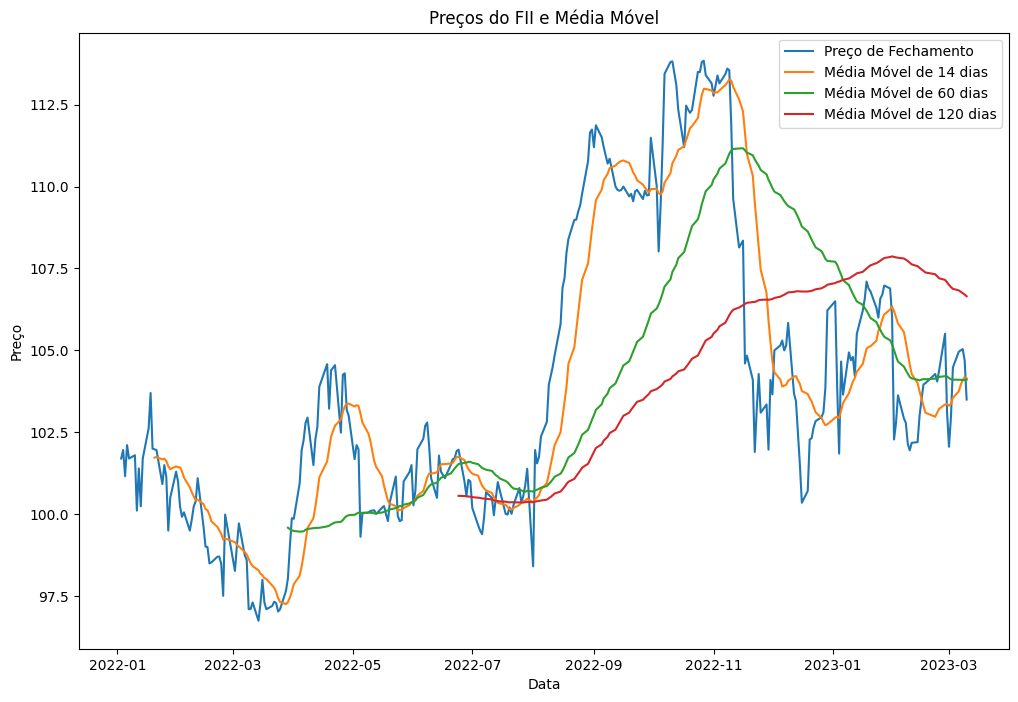

In [ ]:
#@title 12) Criação de PDF e Salvando no GCP o gráfico anterior

import os
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import storage
from google.oauth2.service_account import Credentials

# Defina o nome do arquivo PDF a ser salvo
pdf_file_name = 'FII_VISC11_Medias.pdf'

# Importe os dados históricos do FII para um DataFrame
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/XPE_FCDRV_02_Desafio/Dados/02_Limpo/VISC11 Dados Históricos.xlsx', sheet_name='VISC11 Historical Data')

# Calcule a média móvel do FII
df['MA14'] = df['Price'].rolling(window=14).mean()
df['MA60'] = df['Price'].rolling(window=60).mean()
df['MA120'] = df['Price'].rolling(window=120).mean()

# Crie um gráfico com os preços de fechamento e a média móvel
plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Price'], label='Preço de Fechamento')
plt.plot(df['Date'], df['MA14'], label='Média Móvel de 14 dias')
plt.plot(df['Date'], df['MA60'], label='Média Móvel de 60 dias')
plt.plot(df['Date'], df['MA120'], label='Média Móvel de 120 dias')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preços do FII e Média Móvel')
plt.legend()

# Salve o gráfico em um arquivo PDF
plt.savefig(pdf_file_name, format='pdf')

# Envie o arquivo PDF para um bucket do GCP
bucket_name = 'xpe_fcdrv_desafio'
credentials_file = '/content/drive/My Drive/Colab Notebooks/XPE_FCDRV_02_Desafio/Credencial_Autenticacao/cred-aut-xpe_fcdrv_desafio.json'

# Autentique as credenciais
creds = Credentials.from_service_account_file(credentials_file)

# Crie um cliente do Cloud Storage
client = storage.Client(credentials=creds)

# Recupere o bucket
bucket = client.get_bucket(bucket_name)

# Crie um blob do arquivo PDF
blob = bucket.blob(pdf_file_name)

# Faça o upload do arquivo PDF para o bucket
blob.upload_from_filename(pdf_file_name)

# Exclua o arquivo PDF local
os.remove(pdf_file_name)

print(f'O arquivo {pdf_file_name} foi salvo no bucket {bucket_name}.')
